In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from modelfunc import save_model

In [2]:
np.random.seed(123) #set random seed for reproducability

In [3]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU'))) #make sure GPU is being used

Num GPUs Available:  1


In [4]:
tf.get_logger().setLevel('ERROR') #hide some warning messages

#### Image Parameters

In [5]:
# With image dimensions 5184 x 5184 we run into oom error
batch_size = 32
img_height = 256
img_width = 256
img_channels = 3

#### Load Data

In [6]:
train_split_test_dir='../0. Project Data/Reshaped zero-padded and split data'

In [7]:
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


#### Building CNN Model

In [8]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip('horizontal'), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [9]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x) # rescaling pixel values from 0-255 to 0-1
# convolution and max pooling layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
# flatten
x = layers.Flatten()(x)
# Dense output classification layer
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                             

In [11]:
model.compile(optimizer='sgd', # Common optimizers include 'adam', 'sgd', and 'rmsprop'.
 loss='sparse_categorical_crossentropy', # Common loss functions include 'binary_crossentropy', 'categorical_crossentropy', and 'mse'.
 metrics=["accuracy"]) #Common metrics include 'accuracy', 'precision', 'recall', and 'f1_score'.

#### Fitting the Model

In [12]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
84/84 [==============================] - 30s 310ms/step - loss: 1.3231 - accuracy: 0.3984 - val_loss: 1.2743 - val_accuracy: 0.3208
Epoch 2/100
84/84 [==============================] - 24s 288ms/step - loss: 1.1853 - accuracy: 0.5205 - val_loss: 1.0069 - val_accuracy: 0.6777
Epoch 3/100
84/84 [==============================] - 25s 292ms/step - loss: 1.0619 - accuracy: 0.5874 - val_loss: 1.0639 - val_accuracy: 0.6357
Epoch 4/100
84/84 [==============================] - 25s 295ms/step - loss: 0.9124 - accuracy: 0.6550 - val_loss: 0.7386 - val_accuracy: 0.7466
Epoch 5/100
84/84 [==============================] - 25s 293ms/step - loss: 0.8237 - accuracy: 0.7005 - val_loss: 0.6733 - val_accuracy: 0.7376
Epoch 6/100
84/84 [==============================] - 25s 292ms/step - loss: 0.7002 - accuracy: 0.7330 - val_loss: 0.6714 - val_accuracy: 0.7241
Epoch 7/100
84/84 [==============================] - 24s 289ms/step - loss: 0.7643 - accuracy: 0.7162 - val_loss: 0.6429 - val_accuracy:

#### Plotting Training and Validation Accuracy and Loss

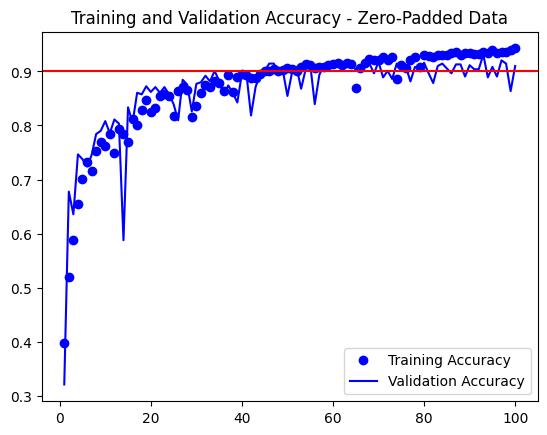

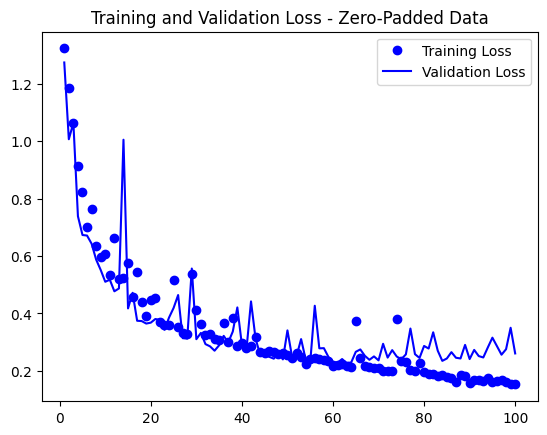

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.title('Training and Validation Accuracy - Zero-Padded Data')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss - Zero-Padded Data')
plt.legend()

#### Saving the Model

In [14]:
save_path = '../3. Model Selection/saved_models/Model 2-Zero-padded Data Model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_model(model, save_path)

Saved model to disk


In [15]:
#below saved files are gitignored

In [16]:
if not os.path.exists('./saved_models/Model 2-Zero-padded Data'):
    os.makedirs('./saved_models/Model 2-Zero-padded Data')
model.save('./saved_models/Model 2-Zero-padded Data')